In [131]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import plotly.io as pio
sns.set()
#importing neccessary packages

In [132]:
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestClassifier

In [133]:
df = pd.read_csv('movie_profit.csv', sep=',')
# importing csv database

In [134]:
df

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action
...,...,...,...,...,...,...,...,...,...
3396,3397,10/28/2011,Like Crazy,250000.0,3395391.0,3.728400e+06,Paramount Pictures,PG-13,Drama
3397,3398,7/14/2000,Chuck&Buck,250000.0,1055671.0,1.157672e+06,Artisan,R,Drama
3398,3399,3/28/1997,Love and Other Catastrophes,250000.0,212285.0,7.432160e+05,Fox Searchlight,R,Comedy
3399,3400,8/28/1998,I Married a Strange Person,250000.0,203134.0,2.031340e+05,Lionsgate,NaN,Comedy


In [135]:
df.shape
# shows the columns and rows of the df

(3401, 9)

In [136]:
df.describe()
#shows numeric statistics on the data

,Unnamed: 0,production_budget,domestic_gross,worldwide_gross
count,3401.00000,3.401000e+03,3.401000e+03,3.401000e+03
mean,1701.00000,3.328474e+07,4.542179e+07,9.411512e+07
std,981.92846,3.489239e+07,5.882566e+07,1.409182e+08
min,1.00000,2.500000e+05,0.000000e+00,0.000000e+00
25%,851.00000,9.000000e+06,6.118683e+06,1.061881e+07
50%,1701.00000,2.000000e+07,2.553382e+07,4.015902e+07
75%,2551.00000,4.500000e+07,6.032379e+07,1.176152e+08
max,3401.00000,1.750000e+08,4.745447e+08,1.304866e+09


In [137]:
df['movie']
#lists only column movie

0                          Evan Almighty
1                             Waterworld
2       King Arthur: Legend of the Sword
3                               47 Ronin
4         Jurassic World: Fallen Kingdom
                      ...               
3396                          Like Crazy
3397                          Chuck&Buck
3398         Love and Other Catastrophes
3399          I Married a Strange Person
3400                            November
Name: movie, Length: 3401, dtype: object

In [138]:
df[['movie', 'genre', 'worldwide_gross']].sort_values('worldwide_gross', ascending=False)[0:10]
#this filters out the dataframe only showing the neccessary columns
#it also filters the df so that we can see which movie performed the best in terms of worldwide gross

,movie,genre,worldwide_gross
4,Jurassic World: Fallen Kingdom,Action,1.304866e+09
426,Minions,Adventure,1.162782e+09
545,Jurassic Park,Action,1.038813e+09
392,Despicable Me 3,Adventure,1.034521e+09
149,Star Wars Ep. I: The Phantom Menace,Adventure,1.027045e+09
39,Zootopia,Adventure,1.019707e+09
380,The Lion King,Adventure,9.863323e+08
387,Despicable Me 2,Adventure,9.752168e+08
253,Jumanji: Welcome to the Jungle,Adventure,9.617585e+08
440,Shrek 2,Adventure,9.370081e+08


In [ ]:
df

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action
...,...,...,...,...,...,...,...,...,...
3396,3397,10/28/2011,Like Crazy,250000.0,3395391.0,3.728400e+06,Paramount Pictures,PG-13,Drama
3397,3398,7/14/2000,Chuck&Buck,250000.0,1055671.0,1.157672e+06,Artisan,R,Drama
3398,3399,3/28/1997,Love and Other Catastrophes,250000.0,212285.0,7.432160e+05,Fox Searchlight,R,Comedy
3399,3400,8/28/1998,I Married a Strange Person,250000.0,203134.0,2.031340e+05,Lionsgate,NaN,Comedy


In [ ]:
df['genre'].unique()
#shows all the different types of genres

array(['Comedy', 'Action', 'Adventure', 'Drama', 'Horror'], dtype=object)

In [ ]:
df['genre'].value_counts()
#shows how many of each movie are in each genre in the dataset

genre
Drama        1236
Comedy        813
Action        573
Adventure     481
Horror        298
Name: count, dtype: int64

In [145]:
fig = px.histogram(df,x="genre", title="Quantity of movies in each Genre", color="genre")
fig.show()

In [ ]:
#now I will be cleaning up the dataframe and making it more accessible
#before doing that I will create a copy of the dataframe
original_df = df.copy()

In [ ]:
df = df[[
    #'Unnamed: 0'
    'release_date', 
    'movie', 
    'production_budget',
    #'domestic_gross', 
    'worldwide_gross', 
    'distributor', 
    #'mpaa_rating',
    'genre'
]]

#I will be dropping the columns that I do not need

In [ ]:
df.rename(columns={
    'release_date':'Release_Date', 
    'movie': 'Movie', 
    'production_budget':'Production_Budget', 
    'worldwide_gross':'Worldwide_Gross', 
    'distributor':'Distributor', 
    'genre':'Genre'}, inplace=True)

#now I will rename the columns for better visibility

C:\Users\Hirtik Maru\AppData\Local\Temp\ipykernel_27604\3115148566.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.isna().sum()
#this finds missing data
#there are not too many missing data (48/3401) so we will not drop the column.

Release_Date          0
Movie                 0
Production_Budget     0
Worldwide_Gross       0
Distributor          48
Genre                 0
dtype: int64

In [ ]:
df = df.replace({None: np.nan})
#replacing missing data with NaN

In [ ]:
df.loc[df.duplicated()]
#finding duplicated data

,Release_Date,Movie,Production_Budget,Worldwide_Gross,Distributor,Genre
2974,4/2/2010,Tau ming chong,4000000.0,38899792.0,NaN,Action


In [ ]:
df.drop(df.index[2974], inplace=True)
#removing duplicated data

In [ ]:
df['ROI Ratio'] = df['Worldwide_Gross'] / df['Production_Budget']
#calculating return on investment ratio, higher the result, the better

In [ ]:
df.sort_values(by=['ROI Ratio'], ascending=False)[0:10]
#sorting database by ROI, highest first

,Release_Date,Movie,Production_Budget,Worldwide_Gross,Distributor,Genre,ROI Ratio
3364,9/25/2009,Paranormal Activity,450000.0,194183034.0,Paramount Pictures,Horror,431.517853
3338,7/14/1999,The Blair Witch Project,600000.0,248300000.0,Artisan,Horror,413.833333
3319,8/13/1942,Bambi,858000.0,268000000.0,RKO Radio Pictures,Drama,312.354312
3256,11/21/1976,Rocky,1000000.0,225000000.0,United Artists,Drama,225.000000
3381,10/17/1978,Halloween,325000.0,70000000.0,Compass International,Horror,215.384615
3329,8/11/1973,American Graffiti,777000.0,140000000.0,Universal,Drama,180.180180
3369,6/11/2004,Napoleon Dynamite,400000.0,46122713.0,Fox Searchlight,Comedy,115.306782
3344,5/9/1980,Friday the 13th,550000.0,59754601.0,Paramount Pictures,Horror,108.644729
3257,1/6/2012,The Devil Inside,1000000.0,101759490.0,Paramount Pictures,Horror,101.759490
2982,12/15/1939,Gone with the Wind,3900000.0,390525192.0,MGM,Drama,100.134665


In [ ]:
#sorts the list by revenue for only horror genre
df[df['Genre'] == 'Horror'].sort_values(by=['ROI Ratio'], ascending=False)[0:10]

,Release_Date,Movie,Production_Budget,Worldwide_Gross,Distributor,Genre,ROI Ratio
3364,9/25/2009,Paranormal Activity,450000.0,194183034.0,Paramount Pictures,Horror,431.517853
3338,7/14/1999,The Blair Witch Project,600000.0,248300000.0,Artisan,Horror,413.833333
3381,10/17/1978,Halloween,325000.0,70000000.0,Compass International,Horror,215.384615
3344,5/9/1980,Friday the 13th,550000.0,59754601.0,Paramount Pictures,Horror,108.644729
3257,1/6/2012,The Devil Inside,1000000.0,101759490.0,Paramount Pictures,Horror,101.759490
3235,10/29/2004,Saw,1200000.0,103880027.0,Lionsgate,Horror,86.566689
3196,4/1/2011,Insidious,1500000.0,99870886.0,FilmDistrict,Horror,66.580591
3258,4/17/2015,Unfriended,1000000.0,62869004.0,Universal,Horror,62.869004
3029,10/20/2010,Paranormal Activity 2,3000000.0,177512032.0,Paramount Pictures,Horror,59.170677
2811,1/20/2017,Split,5000000.0,278306227.0,Universal,Horror,55.661245


In [ ]:
#we will create a copy of this dataframe that we have cleaned up before moving on
df_clean = df.copy()

In [ ]:
#we will be focusing on the best horror movies
horror_df = df[df['Genre'] == 'Horror']

<Axes: xlabel='Production_Budget', ylabel='Worldwide_Gross'>

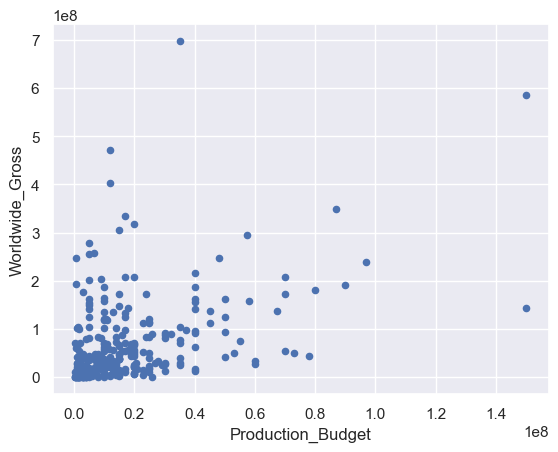

In [ ]:
horror_df.plot.scatter(x='Production_Budget', y='Worldwide_Gross')
#creates a scatter plot, comparing production budget and worldwide gross

In [ ]:
#now in order to use machine learning, we will need to encode all columns in order for the machine to learn from it
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
for x in horror_df.keys():
    horror_df[f'{x}_enc'] = le.fit_transform(horror_df[x])

#this for loop encodes all columns

C:\Users\Hirtik Maru\AppData\Local\Temp\ipykernel_27604\209017912.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hirtik Maru\AppData\Local\Temp\ipykernel_27604\209017912.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hirtik Maru\AppData\Local\Temp\ipykernel_27604\209017912.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
horror_df2 = horror_df.copy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#we will be using this package to use machine learning to make predictions given 2 variables

In [ ]:
predict_horror_gross = horror_df[['Worldwide_Gross', 'Distributor_enc', 'ROI Ratio']]

In [147]:
X = predict_horror_gross.drop(columns=['Worldwide_Gross'])
y = predict_horror_gross['Worldwide_Gross']
model = DecisionTreeClassifier()
model.fit(X.values, y)
predictions =  model.predict([[67, 250]])
predictions

#here we have used machine learning to predict given 2 columns '67 - distributor' and '1 - ROI Ratio' and the prediction is 15136870 for worldwide Gross

array([42411721.])

In [151]:
X = predict_horror_gross.drop(columns=['Worldwide_Gross'])
y = predict_horror_gross['Worldwide_Gross']
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print(f"Accuracy of the DecisionTreeClassifier on the test set: {score}")

#here we have used accuracy score package to check how accurate our prediction is between 0-1. 0-0.33 is the output, meaning that the prediction is not at all accurate.

Accuracy of the DecisionTreeClassifier on the test set: 0.016666666666666666
